# Discretization Problem Statement

In [1]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import boston dataset
data = pd.read_csv('C:\\Users\\vaibh\\Desktop\\360 Digitmg\\Data Preprocessing\\DataSets\\iris.csv')

In [3]:
# Top rows of dataset
data.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [4]:
# Check the column titles
data.columns

Index(['Unnamed: 0', 'Sepal.Length', 'Sepal.Width', 'Petal.Length',
       'Petal.Width', 'Species'],
      dtype='object')

In [5]:
# Shape of dataset
data.shape

(150, 6)

In [6]:
# Get data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# Check for null values
data.isnull().sum()

Unnamed: 0      0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

There are no null values in the given datasets 

In [8]:
# Check for duplicate values
data.duplicated().sum()

0

There are no duplicate values

In [9]:
# Display desciptive statistics for the dataset
data.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
# Use boxplot to check for outliers
feature_dict = pd.DataFrame(columns=['Name of Feature','Description','Type','Relevance'])

In [12]:
feature_dict ['Name of Feature'] = data.columns

In [13]:
feature_dict ['Description'] = ['Sr.No.',
'Length of sepal',
'Width of sepal',
'Length of Petal',
'Width of sepal','Name of Spieces']

In [14]:
feature_dict['Type'] = ['Ratio','Ratio','Ratio','Ratio',
                        'Ratio','Nominal']

In [15]:
feature_dict['Relevance'] = ['Irrelevant','Relevant','Relevant',
                            'Relevant','Relevant','Relevant']

In [16]:
feature_dict

,Name of Feature,Description,Type,Relevance
0,Unnamed: 0,Sr.No.,Ratio,Irrelevant
1,Sepal.Length,Length of sepal,Ratio,Relevant
2,Sepal.Width,Width of sepal,Ratio,Relevant
3,Petal.Length,Length of Petal,Ratio,Relevant
4,Petal.Width,Width of sepal,Ratio,Relevant
5,Species,Name of Spieces,Nominal,Relevant


In [17]:
# Dropping Irrelevant feature
data.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [18]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


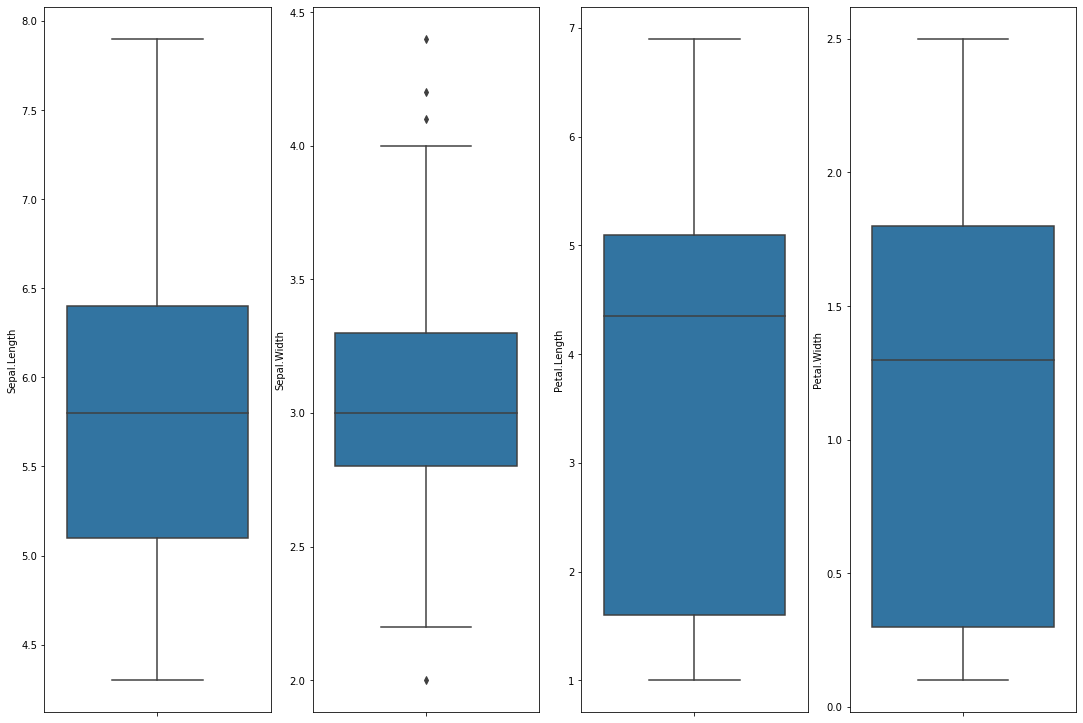

In [19]:
# Boxplot for all the features in the dataset to check for outliers

fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(15, 10))
index = 0
axs = axs.flatten()
data1 = data.iloc[:,:4]
for k,v in data1.items():
    sns.boxplot(y=k, data=data1, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.55, w_pad=0.5, h_pad=4.0)

Outliers are present in sepal_width

In [20]:
# Making a copy of the original dataset
data2 = data.copy()

#Using IQR for outlier treatments

IQR = data2['Sepal.Width'].quantile(0.75) - data2['Sepal.Width'].quantile(0.25)
low_end = data2['Sepal.Width'].quantile(0.25) - (1.5*IQR)
upper_end = data2['Sepal.Width'].quantile(0.75) + (1.5*IQR)
data2['Sepal.Width'] = pd.DataFrame(np.where(data2['Sepal.Width'] > upper_end,upper_end, 
                      np.where(data2['Sepal.Width'] < low_end,low_end,data2['Sepal.Width'])))
    

In [21]:
data2

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<AxesSubplot:xlabel='Sepal.Width'>

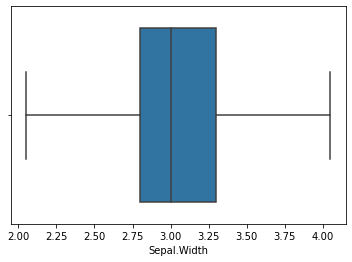

In [22]:
# Boxplot for Sepal.Width (outliers removed)

sns.boxplot(x = data2['Sepal.Width'])

All the duplicated values, outliers are treated and irrelevant data are dropped.
The new dataset can be used for model building.

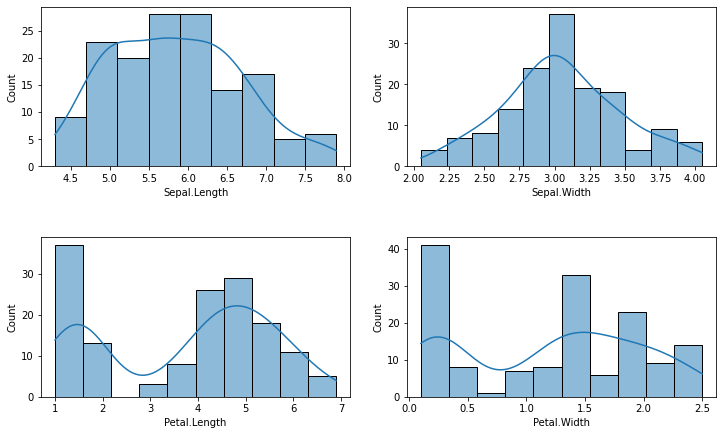

In [23]:
# Plotting histograms for the features

plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.histplot(data=data2['Sepal.Length'], kde=1)
plt.subplot(2,2,2)
sns.histplot(data=data2['Sepal.Width'], kde=1)

plt.subplot(2,2,3)
sns.histplot(data=data2['Petal.Length'], kde=1, bins = 10)
plt.subplot(2,2,4)
sns.histplot(data=data2['Petal.Width'], kde=1, bins = 10)

plt.tight_layout(pad=0.55, w_pad=2, h_pad=4.0)

    The data is normally distributed for Sepal length and Sepal width and seems to be bimodal for Petal Length and Petal Width 

In [24]:
data2.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.00000,150.000000,150.000000
mean,5.843333,3.05400,3.758000,1.199333
std,0.828066,0.42539,1.765298,0.762238
min,4.300000,2.05000,1.000000,0.100000
25%,5.100000,2.80000,1.600000,0.300000
50%,5.800000,3.00000,4.350000,1.300000
75%,6.400000,3.30000,5.100000,1.800000
max,7.900000,4.05000,6.900000,2.500000


In [25]:
# Discretization of the columns
for col in data2.iloc[:,:4]:
    data2[col] = pd.cut(data2[col], bins=5, labels=np.arange(5), right=False)

data2

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,3,0,0,setosa
1,0,2,0,0,setosa
2,0,2,0,0,setosa
3,0,2,0,0,setosa
4,0,3,0,0,setosa
...,...,...,...,...,...
145,3,2,3,4,virginica
146,2,1,3,3,virginica
147,3,2,3,3,virginica
148,2,3,3,4,virginica


In [26]:
# Checking for unique values in Species feature
data2.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<AxesSubplot:xlabel='Species', ylabel='count'>

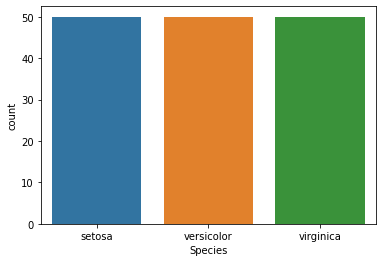

In [27]:
# Count of Species Types
sns.countplot(data=data2,x = data2.Species)

The count of species types ('setosa', 'versicolor', 'virginica') in the dataset are equal.

In [28]:
data2.Species = data2.Species.map({'setosa':0,'versicolor':1,'virginica': 2})

In [29]:
# Displaying the pre-processed data
data2.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,3,0,0,0
1,0,2,0,0,0
2,0,2,0,0,0
3,0,2,0,0,0
4,0,3,0,0,0


The dataset is ready for model training. 